# תובנה רועי

In [1]:
#משימות שלי
#  seaborn only הצגת גרפים כמו שליהי עשתה

#ככל שהגיל של המשתמש עולה כך יש לו יתר כסף הוא מועסק והוא נשוי. כמות הילדים לא קשורה לגיל
#השערה היא שבגלל שהמבוגרים מזמינים 2 ארוחות הם מחפשים דילים משתלמים ואין מסםיק לכן הדירוג שלהם בםרמטר זה יורד באופן כי מובהק

#upload the data
!pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns  # for creating the graphs

# Replace 'your_file.csv' with the path to your CSV file
url="https://raw.githubusercontent.com/roeiraz12/project/main/onlinedeliverydata.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

In [2]:
df.shape

(388, 55)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [4]:
column_names = df.columns
column_names


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

**:המרת עמודת מטקסט למספר**

In [5]:
#changing the text value in numeric values in some coulomns:


column_names = df.columns
column_names


#new dictionary 
mapping = {
    'Strongly agree': 5,
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}

#new dictionary 
mapping2 = {
    'Very Important': 5,
    'Important': 4,
    'Moderately Important': 3,
    'Slightly Important': 2,
    'Unimportant': 1
}

#new dictionary 
mapping3 = {
    'Strongly agree': 1,
    'Strongly Agree': 1,
    'Agree': 2,
    'Neutral': 3,
    'Disagree': 4,
    'Strongly disagree': 5
}

mapping4 = {
    ' Web browser': 1,
    ' Direct call': 2,
    ' Walk-in': 3,
}

mapping5 = {
    'Yes': 1,
    'No': 0
}

mapping6 = {
    'Female': 0,
    'Male': 1
}

# List of columns to apply the mappings to
columns = [
    'Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system',
    'Self Cooking', 'Health Concern', 'Unavailability', 'Residence in busy location',
    
    'Unaffordable','Delivery person ability', #?חייב לציין שלא הבנתי מה העמודות מכאן והלאה אומרות
     'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time']

columns2 = [
    'Less Delivery time',
    'High Quality of package', 'Number of calls', 'Politeness',
    'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity']

columns3 = [   #הפוך בדירוג
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Long delivery time', 'Delay of delivery person getting assigned','Delay of delivery person picking up food', 'Wrong order delivered',
    'Missing item', 'Order placed by mistake']
  

columns4 = ['Medium (P2)']

columns5 = ['Output']

columns6 = ['Gender']


# Apply the mapping to each specified column using .map()
for col in columns:
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Apply the second mapping to each specified column using .map()
for col in columns2:
    if col in df.columns:
        df[col] = df[col].map(mapping2)

# Apply the third mapping to each specified column using .map()
for col in columns3:
    if col in df.columns:
        df[col] = df[col].map(mapping3)
        
# Apply the third mapping to each specified column using .map()
for col in columns4:
    if col in df.columns:
        df[col] = df[col].map(mapping4)
        
for col in columns5:
    if col in df.columns:
        df[col] = df[col].map(mapping5)
        
for col in columns6:
    if col in df.columns:
        df[col] = df[col].map(mapping6)


# Display the updated dataframe
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,3,3,3,3,3,3,3,3,1,Nil\n
1,24,0,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,5,5,5,5,5,5,5,5,1,Nil
2,22,1,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,4,5,3,5,5,4,5,3,1,"Many a times payment gateways are an issue, so..."
3,22,0,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,5,4,3,5,5,5,5,4,1,nil
4,22,1,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,4,4,3,4,4,4,5,5,1,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,4,4,4,4,4,4,4,4,1,Nil
384,23,0,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,3,5,3,3,3,3,5,5,1,Nil
385,22,0,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,4,5,4,4,5,5,5,5,1,Nil
386,23,1,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,4,5,4,5,5,4,5,5,1,Language barrier is also one major issue. Mosl...


****:יצירת עמודה חדשה שתקרא "דירוג כולל" הבנויה מממוצע הציונים בכל קטגוריה**** 

In [6]:
#creating a new coulomn called "Overall Rating" between 1-5:
#average rating of each category
#
columns_to_average = ['Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system', 'Delivery person ability','Less Delivery time','High Quality of package',
    'Politeness','Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience',
    'Long delivery time', 'Delay of delivery person getting assigned','Delay of delivery person picking up food','Wrong order delivered',
    'Missing item', 'Order placed by mistake']
df["Overall Rating"] = df[columns_to_average].mean(axis=1)


df[["Overall Rating"]] #we can see the overall rating of each castumer down here:

,Overall Rating
0,2.750000
1,3.041667
2,3.166667
3,3.541667
4,3.125000
...,...
383,3.041667
384,3.000000
385,2.958333
386,3.416667


**:ניתן לראות שככל שהגיל של המשתמש עולה הדירוג הממוצע יורד**

In [7]:
#עשיתי ממוצע  לדירוג לכל שכבת גיל. הפלט יהיה בסדר יורד של הדירוג  
rating_df = df.groupby(['Age'])[['Overall Rating']].mean().reset_index().sort_values(by="Age" , ascending = True)
rating_df

,Age,Overall Rating
0,18,3.583333
1,19,3.406250
2,20,3.486111
3,21,3.436594
4,22,3.397661
5,23,3.295662
6,24,3.413333
7,25,3.399840
8,26,3.335714
9,27,3.214286


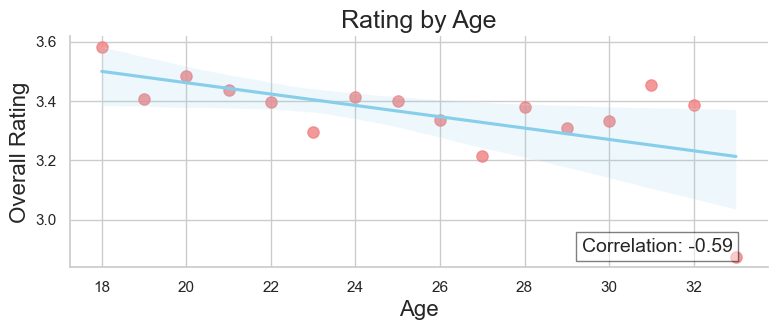

In [8]:
from scipy.stats import pearsonr

sns.set(style="whitegrid", palette="pastel", rc={'figure.figsize':(9,3)})


ax = sns.regplot(x=rating_df["Age"], y=rating_df["Overall Rating"], 
                 line_kws={"color": "skyblue"}, 
                 scatter_kws={"color": "lightcoral", "s": 65})


ax.set_title('Rating by Age', fontsize=18)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Overall Rating', fontsize=16)


r_value, _ = pearsonr(rating_df["Age"], rating_df["Overall Rating"])
rounded_r_value = round(r_value, 2)


ax.text(0.95, 0.05, f'Correlation: {rounded_r_value}', 
        horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=14, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Adjust layout and show plot
sns.despine()

## :יצירת עמודה חדשה הבנויה מיחס הגיל והדירוג

In [9]:
#scatter and box
columns_to_div = ['Overall Rating', 'Age']



# יצירת עמודה חדשה 'div' עם תוצאה של החילוק של כל עמודה ברשימה בעמודת Age
for column in columns_to_div:
    df[f'div_{column}'] =  df["Overall Rating"] / df['Age']  

div_df = df[[f'div_{column}']]

df["div"] = df[[f'div_{column}']]

new_df = df.groupby('Age')[['div']].mean()   #evry year the sum of people impact
new_df

,div
Age,
18,0.199074
19,0.179276
20,0.174306
21,0.163647
22,0.154439
23,0.143290
24,0.142222
25,0.135994
26,0.128297


## :ניתן לראות בבירור שכאשר הגיל עולה הדירוג יורד

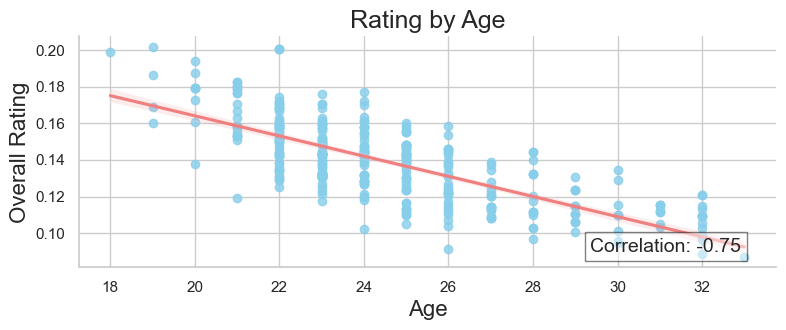

In [10]:
from scipy.stats import pearsonr


sns.set(style="whitegrid", palette="pastel",  rc={'figure.figsize':(9,3)})


ax = sns.regplot(x=df["Age"], y=df["div"], 
                 line_kws={"color": "lightcoral"}, 
                 scatter_kws={"color": "skyblue"})

# Set title and labels
ax.set_title('Rating by Age', fontsize=18)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Overall Rating', fontsize=16)


r_value, _ = pearsonr(df["Age"], df["div"])
rounded_r_value = round(r_value, 2)




# Add the correlation text
ax.text(0.95, 0.05, f'Correlation: {rounded_r_value}', 
        horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=14, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))


sns.despine()

### ?ננסה להתעמק יותר בנתונים ונחפש הסבר מדוע בקרב משתמשים בוגרים יותר שביעות הרצון מהחברה יורדת

#### ?נבדוק אולי בכך שהמשתמשים הבוגרים מזמינים יותר דרך אמצעי פחות חדיש כמו הגעה פיזית לסניף או טלפונית היא הגורמת לדירוג הנמוך

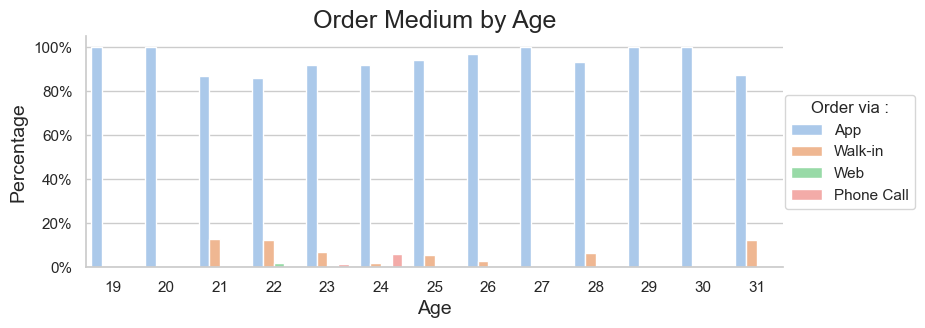

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

sns.set(style="whitegrid", palette="pastel", rc={'figure.figsize':(9,3)})

# Filter the data
filtered_df = df[(df['Age'] >= 19) & (df['Age'] <= 31)]


proportions_df = filtered_df.groupby(['Age', 'Medium (P1)']).size().reset_index(name='Count')
total_counts = proportions_df.groupby('Age')['Count'].transform('sum')
proportions_df['Proportion'] = proportions_df['Count'] / total_counts


ax = sns.barplot(x='Age', y='Proportion', hue='Medium (P1)', data=proportions_df)


ax.set_title('Order Medium by Age', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)


ax.yaxis.set_major_formatter(PercentFormatter(1))


legend_labels = ['App', 'Walk-in', 'Web','Phone Call']  # Update these as needed


handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Order via :')


sns.despine()
plt.show()


### .כפי שניתן לראות אין קשר בין אמצעי ההזמנה לבין הגיל

### ?נבדוק האם דירוג טעם הארוחה משתנה בין הגילים

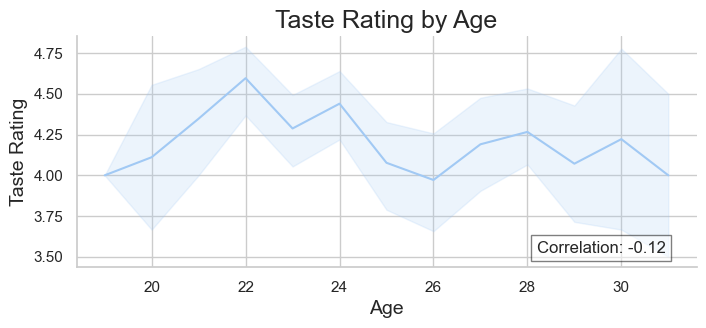

In [12]:
taste_df = df.groupby(['Age'])[['Good Taste ']].mean().reset_index().sort_values(by="Age", ascending=True)


sns.set(style="whitegrid", palette="pastel", rc={'figure.figsize':(8,3)})
filtered_df = df[(df['Age'] >= 19) & (df['Age'] <= 31)]
ax = sns.lineplot(data=filtered_df, x='Age', y='Good Taste ')


ax.set_title('Taste Rating by Age', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Taste Rating', fontsize=14)


r_value, _ = pearsonr(filtered_df["Age"], filtered_df['Good Taste '])
rounded_r_value = round(r_value, 2)


ax.text(0.95, 0.05, f'Correlation: {rounded_r_value}', 
        horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))


sns.despine()

***.גם כאן ניתן לראות שלא רק טעם הארוחה הוא הגורם לירידה כה גדולה בדירוג הכללי***

## ?נבדוק האם הפער בדירוג נובע מסוג הארוחה המוזמנת

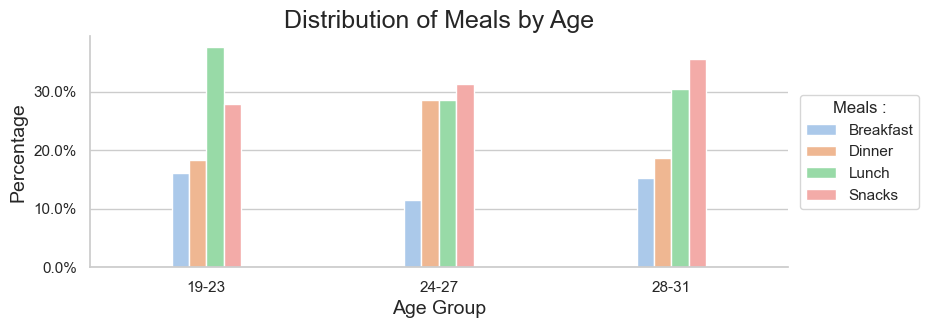

In [13]:
sns.set(style="whitegrid", palette="pastel", rc={'figure.figsize':(9,3)})


bins = [19, 23, 27, 31]
labels = ['19-23', '24-27', '28-31']


df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


proportions_df = df.groupby(['Age Group', 'Meal(P1)']).size().reset_index(name='Count')
total_counts = proportions_df.groupby('Age Group')['Count'].transform('sum')
proportions_df['Proportion'] = proportions_df['Count'] / total_counts


ax = sns.barplot(x='Age Group', y='Proportion', hue='Meal(P1)', data=proportions_df, width=0.3)


ax.set_title('Distribution of Meals by Age', fontsize=18)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)


ax.yaxis.set_major_formatter(PercentFormatter(1))

ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='Meals :')


sns.despine()

***גם כאן לא ניתן להבחין בשינוי מהותי באופן בגילים המבוגרים יותר***

# ?נבדוק באיזה פרמטר הפער בין שביעות הרצון של הצעירים למבוגרים הכי גדולה

In [14]:
parm_df = df.groupby(['Age'])[['Ease and convenient', 'Time saving', 'Easy Payment option',
    'Good Food quality', 'Good Tracking system',
    'Self Cooking', 'Health Concern', 'Unavailability', 'Residence in busy location',
    'Unaffordable','Delivery person ability', 'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time','Less Delivery time',
    'High Quality of package', 'Number of calls', 'Politeness','Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity',   
    'More restaurant choices','More Offers and Discount','Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Long delivery time',
    'Delay of delivery person getting assigned','Delay of delivery person picking up food', 'Wrong order delivered',
    'Missing item', 'Order placed by mistake']].mean().reset_index().sort_values(by="Age" , ascending = True)

final_df = parm_df[(parm_df['Age'] >= 19) & (parm_df['Age'] <= 32)] 

In [15]:
# Calculate the difference between max and min for each column 
range_series = (final_df.set_index('Age').max() - final_df.set_index('Age').min()).round(1)

# Identify the top 34 columns with the highest range
top_34_changes = range_series.nlargest(3)

# Display the result
print(top_34_changes.to_string()) #מדפיס נתונים בלבד

Easy Payment option         2.0
More Offers and Discount    1.9
Wrong order delivered       1.9


**: מצאנו שבפרמטרים הבאים הפער היה הגבוה ביותר**
1. נוחות התשלום
2. חוסר בהנחות והטבות
3. טעות בהזמנה    

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


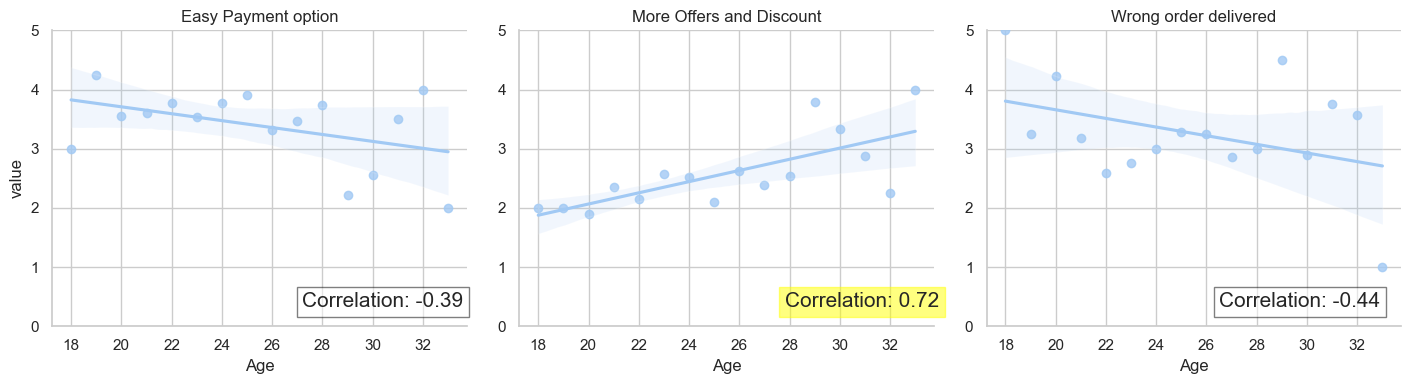

In [19]:
new_df = df.groupby(["Age"])[['Easy Payment option' , 'More Offers and Discount','Wrong order delivered']].mean()

sns.set(style="whitegrid", palette="pastel")
new_df = new_df.reset_index()
# Create a FacetGrid with 2 rows and 3 columns
g = sns.FacetGrid(new_df.melt(id_vars=['Age']), col='variable', col_wrap=3, height=4, aspect=1.2, 
                  sharex=False, sharey=False)

# Map regplot to each subplot based on the variable
g.map(sns.regplot, 'Age', 'value')

# Set titles for each subplot
titles = ['Easy Payment option', 'More Offers and Discount', 'Wrong order delivered']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Set y-axis limits for all subplots
for ax in g.axes.flat:
    ax.set_ylim(0, 5)  # Set y-axis limits from 0 to 5


r_value, _ = pearsonr(new_df["Age"], new_df['Easy Payment option'])
rounded_r_value = round(r_value, 2)

# Add the correlation text
ax.text(0.95, 0.05, f'Correlation: {rounded_r_value}', 
        horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=15, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

r_value, _ = pearsonr(new_df["Age"], new_df['More Offers and Discount']) #טקסט גרף הנחות
rounded_r_value = round(r_value, 2)

ax.text(-0.3, 0.05, f'Correlation: {rounded_r_value}', 
        horizontalalignment='center', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=15, 
        bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='yellow'))

r_value, _ = pearsonr(new_df["Age"], new_df['Wrong order delivered']) #טקסט גרף נוחות
rounded_r_value = round(r_value, 2)

ax.text(-1.65, 0.05, f'Correlation: {rounded_r_value}', 
        horizontalalignment='left', 
        verticalalignment='bottom', 
        transform=ax.transAxes, 
        fontsize=15, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

    
    
# Adjust layout
#g.fig.tight_layout()

# Display the plot
sns.despine()

# :מסקנה


***:לחברת סוויגי יש פערים שונים בשביעות הרצון בקרב משתמשים יותר מבוגרים. ניתן לשער כי פער זה בין המשתמשים הצעירים למבוגרים נובע ממספר גורמים***

1. חוסר הטבות והנחות. למשתמשים הבוגרים חוסר זה השפיע רבות על מתן הציון הסופי לחברת סוויגי
   .ניתן לשער שהמשתמשים הבוגרים מזמינים יחד עם בן זוגם ולכן חשוב להם שיהיו יותר הנחות משתלמות מאשר למשתמשים צעירים.

2.  .פער טכנולוגי בין המשתמשים. חוסר ידע של המשתמשים המבוגרים בכלים טכנולוגיים כגון תשלום בכרטיס אשראי דרך הטלפון. ומנגד,יעילות של המערכת למשתמשים צעירים  
     

***תובנה 2******************************************************************************************************************8

#רעיונות

# פילחים לפי מנה סוג מנה מי מזמין גיל מגדר
# מתי טועים יותר בהזמנות
גברים מזמינים פי 2 יותר ממתקים מנשים
+יום הזמנה לפי מנה גיל מגדר וכדו

In [ ]:
df["Gender"].value_counts()

In [ ]:
#ממתקים קונים יותר מבוגרים#גברים מזמנים יותר ממתקים מנשים ב11 אחוז
snack_df = df[(df['Meal(P1)'] == "Snacks")]     #0.36 m   #0.25
snack_df["Gender"].value_counts()

In [ ]:
#  למה ממתקים הארוחה הכי נמכרת?
#לא בגלל הטעם!
#דירוג כללי עולה מעט בקינוחים
#לטובת ממתקים ב0.3 בדירוג Delivery person ability,Good Road Condition,0.2 Google Maps Accuracy,
#פחות טעויות במשלוח

In [ ]:
#למה ממתקים הכי נמכר?
print(snack_df["Poor Hygiene"].mean() - df["Poor Hygiene"].mean())


#late_df = df[(df['Late Delivery'] == 5) | (df['Late Delivery'] == 4)]   
#late_df['Order Time'].value_counts()

In [ ]:
columns_to_compare = [ 
    'Less Delivery time','High Quality of package','Number of calls','Politeness','Freshness ',
    'Temperature','Good Taste ','Good Quantity', 'Residence in busy location','Google Maps Accuracy',
    'Good Road Condition','Low quantity low time','Delivery person ability', 'Order placed by mistake',
    'Missing item', 'Wrong order delivered', 'Delay of delivery person picking up food',
    'Delay of delivery person getting assigned', 'Long delivery time', 'Unaffordable', 
    'Unavailability', 'Bad past experience', 'Poor Hygiene', 'Late Delivery', 
    'Health Concern', 'Self Cooking', 'Good Tracking system', 'Good Food quality', 
    'More Offers and Discount', 'Easy Payment option', 'More restaurant choices', 
    'Time saving', 'Ease and convenient'
]

# חישוב ההפרשים לכל עמודה ואחסונם במילון
differences = {}
for column in columns_to_compare:
    difference = snack_df[column].mean() - df[column].mean()
    differences[column] = difference

# מציאת שלושת ההפרשים הגדולים ביותר
sorted_differences = sorted(differences.items(), key=lambda x: abs(x[1]), reverse=True)[:8]

for column, diff in sorted_differences:
    print(f"ההפרש ב-{column} הוא: {diff}")


ההפרש ב-Delivery person ability הוא: 0.28832723644828695
ההפרש ב-Wrong order delivered הוא: 0.26429996674426315
ההפרש ב-Order placed by mistake הוא: 0.2611406717658795
ההפרש ב-Missing item הוא: 0.2584802128367141
בעמודות האלה הייתרון של הקינוחים.
עצם זה שנמנעות טעויות במשלוח זה הסיבה של הזמנת קינוחים בכמות גבוהה?

In [ ]:
#כמה תדיר זה טעויות במשלוחים
#כללי
sns.set(style="whitegrid", palette="pastel", rc={'figure.figsize':(9,3)})



proportions_df = df.groupby(['Meal(P1)', 'Wrong order delivered']).size().reset_index(name='Count')
total_counts = proportions_df.groupby('Meal(P1)')['Count'].transform('sum')
proportions_df['Proportion'] = proportions_df['Count'] / total_counts


ax = sns.barplot(x='Meal(P1)', y='Proportion', hue='Wrong order delivered', data=proportions_df, width=0.3)


ax.set_title('Wrong Order by Meals', fontsize=18)
ax.set_xlabel('Meals', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)


ax.yaxis.set_major_formatter(PercentFormatter(1))

legend_labels = ['Strongly agree', 'Agree', 'Neutral','Disagree','Strongly disagree']  # Update these as needed


handles, _ = ax.get_legend_handles_labels()

ax.legend(handles, legend_labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Meals :')


sns.despine()

In [ ]:
#מצאתי שבאמת בקינוחין יש פחות טעויות בהזמנה ננסה להעמיק ולראות אם יש עוד סיבה?
#אולי זמן משלוח או הימים שבהם מזמינים קינוחים או אולי קשור לזה שגברים משמינים קצת יותר בממוצע<?

#הרחבות:#

In [ ]:
#היטמאפ
corrs = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(30,30))  # אפשר לשנות לגודל המתאים
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
new_df = df.groupby(['Age'])[['Family size']].mean().reset_index().sort_values(by="Age" , ascending = True)
new_df

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Age', stat='percent', hue='Output' , multiple = 'fill')   #, multiple = 'fill' )#, 'dodge', 'stack', 'fill')

r_value, _ = pearsonr(df["Age"], df['Output'])
rounded_r_value = round(r_value, 2)
print(str(rounded_r_value)+" :מקדם מתאם הקורולציה") 

סתם:

In [ ]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']
age_counts = age_counts.sort_values(by="Age")

# Display the result
age_counts

In [ ]:
df.describe()

In [ ]:
#scatter and box
columns_to_div = ['Overall Rating', 'Age']



# יצירת עמודה חדשה 'div' עם תוצאה של החילוק של כל עמודה ברשימה בעמודת Age
for column in columns_to_div:
    df[f'div_{column}'] =  df['Age']  / df["Overall Rating"] 

div_df = df[[f'div_{column}']]

div_df

In [ ]:
ig, axes = plt.subplots(figsize=(12, 4), ncols=2)
sns.regplot(x = "Good Tracking system", y = "Good Quantity" , data= df , ax=axes[0])
sns.lineplot(x="Good Quantity", y="Good Quantity",   estimator = 'mean',   data=df,errorbar=None, ax=axes[1])
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include='number')

# Create a new DataFrame with only numeric values
numeric_df = df[numeric_columns.columns]

correlation_matrix = numeric_df.corr(numeric_only = True, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix['Age'].transpose()
plt.figure(figsize=(17,2))
subset_correlation_matrix = numeric_df.corr()
sns.heatmap(data=subset_correlation_matrix,cmap='coolwarm', annot=True, xticklabels=numeric_df.columns.tolist())
plt.show()

In [ ]:
corrs = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(5,3))  # אפשר לשנות לגודל המתאים
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(4,3))  #figure size
sns.scatterplot(data = df[['Overall Rating']])

In [ ]:
med_df = df.groupby('Age')[['Long delivery time']].count()  #evry year the sum of people impact
med_df

In [ ]:
men_df = df.groupby('Age')[["Over All Satisfaction"]].mean().head(10)    #evry year the sum of people impact
top_5 = men_df.sort_values(by="Over All Satisfaction", ascending=False).head(10)
top_5

In [ ]:
age_diff = final_df.set_index('Age').diff().dropna()

# Unpivot the DataFrame to have one row per age difference and category
melted_diff = age_diff.reset_index().melt(id_vars='Age', var_name='Category', value_name='Difference')

# Sort by the absolute difference and take the top 34 changes
top_34_changes = melted_diff.iloc[melted_diff['Difference'].abs().argsort()[-34:]]

# Display the result
top_34_changes